## This code does a machine learning - multi linear fitting to the equation

$$ log [Acid]_{org} = A *log [Extratant] + B* log [Acid]_{ini} + C + D*Weiner(extractant) + E*.....  $$

In [38]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

def R2adj(R:float, np: int, nfeatures:int ):
       return 1 - (1-R)*(0.3*np-1)/(0.3*np-nfeatures-1)

In [2]:
df = pd.read_csv("csvData/articledataDBmerged4.csv", skiprows=0,skip_blank_lines=True, index_col=0 )
#df = pd.read_csv("../csvData/articledataDBextCalcD.dat", skiprows=0,skip_blank_lines=True )
#df = df[df['cid_PM'].isna() == True]
df

,cid,cid_PM,cid_solvent,cid_acid,CextratantEq (M),ExtractantName,Cextractant (M),AverageAggregateSize (A),Nextractantmol,ExtractantMonomer (%),...,Rotatable bond count_acid,H bond donor count_acid,H bond acceptor count_acid,Charge_acid,Covalent Unit count_acid,TPSA_acid,Wiener_acid,Branching Index_acid,Polarity Index_acid,Heterogeneity Index_acid
0,70700400.0,NaN,8182.0,944.0,NaN,TODGA,0.10,NaN,NaN,NaN,...,0.0,1.0,3.0,0.0,1.0,66.1,9.0,0.0,4.707928,1.015
1,70700400.0,NaN,8182.0,944.0,NaN,TODGA,0.10,NaN,NaN,NaN,...,0.0,1.0,3.0,0.0,1.0,66.1,9.0,0.0,4.707928,1.015
2,70700400.0,NaN,8182.0,944.0,NaN,TODGA,0.10,NaN,NaN,NaN,...,0.0,1.0,3.0,0.0,1.0,66.1,9.0,0.0,4.707928,1.015
3,70700400.0,NaN,8182.0,944.0,NaN,TODGA,0.10,NaN,NaN,NaN,...,0.0,1.0,3.0,0.0,1.0,66.1,9.0,0.0,4.707928,1.015
4,70700400.0,NaN,8182.0,944.0,NaN,TODGA,0.10,NaN,NaN,NaN,...,0.0,1.0,3.0,0.0,1.0,66.1,9.0,0.0,4.707928,1.015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8161,70700400.0,NaN,8900.0,1118.0,NaN,TODGA,0.02,NaN,NaN,NaN,...,0.0,2.0,4.0,0.0,1.0,83.0,16.0,0.0,5.160458,2.708
8162,70700400.0,NaN,8900.0,1118.0,NaN,TODGA,0.08,NaN,NaN,NaN,...,0.0,2.0,4.0,0.0,1.0,83.0,16.0,0.0,5.160458,2.708
8163,70700400.0,NaN,8900.0,1118.0,NaN,TODGA,0.06,NaN,NaN,NaN,...,0.0,2.0,4.0,0.0,1.0,83.0,16.0,0.0,5.160458,2.708
8164,70700400.0,NaN,8900.0,1118.0,NaN,TODGA,0.04,NaN,NaN,NaN,...,0.0,2.0,4.0,0.0,1.0,83.0,16.0,0.0,5.160458,2.708


In [3]:
##Calculates the D values if the Extraction is known...
def Dacid(row):
    cacidorg = row['CacidOrg (M)']
    cacid = row['Cacid (M)']
    if ((cacidorg>0) & (cacid>0)):
        return (cacidorg)/(cacid-cacidorg)

df['Dacid (calc)'] = df.apply(Dacid, axis=1)
#calculate log of some fields..
def logDacid(row):
    Dacid = row['Dacid (calc)']
    if (Dacid>0) :
        return np.log(Dacid)

def logAcid(row):
    HNO3ini = row['Cacid (M)']
    if (HNO3ini>0) :
        return np.log(HNO3ini)

def logAcidOrg(row):
    HNO3org = row['CacidOrg (M)']
    if (HNO3org>0) :
        return np.log(HNO3org)

##Calculates the D values if the Extraction is known...
def logExtractant(row):
    Extractantini = row['Cextractant (M)']
    #print('DHNO3:', DHNO3)
    #print('At:',row.name)
    if (Extractantini > 0) :
        #print('DHNO3',DHNO3, 'HNO3org:', HNO3org, ' at row: ', row.name)
        return np.log(Extractantini)

def hb_sum(row):
    return row['H bond donor count']+row['H bond acceptor count']

df['logAcid'] = df.apply(logAcid, axis=1)
df['logAcidOrg'] = df.apply(logAcidOrg, axis=1)
df['logDacid'] = df.apply(logDacid, axis=1)
df['logExtractant'] = df.apply(logExtractant, axis=1)
df['HBsum'] = df.apply(hb_sum, axis=1)

In [4]:
df['ref citation'].unique()

array(['tachimori20022', 'tachimori2002', 'tachimori20023',
       'allison004Todga', 'ravi2012', 'jensen2007', 'ravi2016',
       'deepika2010', 'sasaki2015', 'campbell2018', 'yaita2004',
       'sharmaTrivalentJapan', 'ansari2006', 'ansari206', 'gujar2010',
       'xiaoleiliu2014', 'zhipengwang2017', 'ravi2013coextraction',
       'swami2017', 'sharma2008', 'swami2018', 'swami2018min',
       'sasakiRapold2007', 'mowafy2007', 'arisaka2011',
       'ravi2013Feasibility', 'ivanov2017', 'whittaker2018',
       'berthon2021', 'tachimoriAlkaline2003', 'ansari2013',
       'ansari2006promissing', 'sasaki2013MIDOATODGA', 'campbell2017',
       'parvathy2022insight', 'parvathy2022D3', 'basu2019', 'pathak2009',
       'swamiUnravel2019', 'parvathy2020', 'prathibha2021', 'dhawa2021',
       'swami2020MD', 'massey2022', 'singh2018', 'sharma2007J',
       'Bell2012', 'Bell20123', 'Bell20120', 'Bell20122',
       'zhizhusasaki2004', 'sasakiSugoSuzukiKimura2005',
       'sasakiZhiSugoKimura2013', 

In [5]:
df.loc[df['CacidOrg (M)'] <0.025  ] [['ref citation','Cextractant (M)']]#['Cacid (M)'].hist() #.plot(x='Cacid (M)', y='CacidOrg (M)', kind='scatter')

,ref citation,Cextractant (M)
0,tachimori20022,0.1000
27,tachimori2002,0.1000
28,tachimori2002,0.1000
30,tachimori2002,0.1000
31,tachimori2002,0.1000
...,...,...
7989,hanson2007,0.7359
7990,hanson2007,0.7359
8054,hanson2007,1.4719
8055,hanson2007,1.4719


In [6]:
df.columns

Index(['cid', 'cid_PM', 'cid_solvent', 'cid_acid', 'CextratantEq (M)',
       'ExtractantName', 'Cextractant (M)', 'AverageAggregateSize (A)',
       'Nextractantmol', 'ExtractantMonomer (%)',
       ...
       'Wiener_acid', 'Branching Index_acid', 'Polarity Index_acid',
       'Heterogeneity Index_acid', 'Dacid (calc)', 'logAcid', 'logAcidOrg',
       'logDacid', 'logExtractant', 'HBsum'],
      dtype='object', length=118)

In [7]:
df['ExtractantName'].unique()

array(['TODGA', 'D3DODGA', 'TEHDGA', 'THDGA', 'TDDGA', 'DEHDODGA',
       'TDdDGA', 'TBP', 'DOHyA', 'DMDBTDMA', 'DEHiBA', 'DEHBA', 'HDEHDGA',
       'DHOA', 'DEHPVA', 'DEHPRA', 'DEHAA', 'TDGA', 'MIDOA', 'DMDODGA',
       'DMDOHEMA', 'Me2-TODGA', 'TBDGA', 'DBBA', 'DBHA', 'DHHA', 'DBEHHA',
       'DEHHA', 'DHEHHA', 'DOOA', 'BHHA', 'TPDGA', 'TOA'], dtype=object)

___
# Data analysis
#### looking for correlation between the fields
#### how good is the topological descriptor ? (how good it correlates?)
#### How would good/bad correlations translate to predictability/accuracy in ML algorithms?
---

# Defining the fields for the Multi-linear Regression

In [8]:
allInputs = [# 'Cextractant (M)',
       #'Nextractantmol', #'ExtractantMonomer (%)', 'intensity','intensityOverSize',
        #'Rg',
        #'Cacid (M)',
        #'Cion (M)',
       #'Cpm (M)',
       'Temp (K)', 'Molecular Weight', 'XlogP',
        'H bond donor count', 'H bond acceptor count',
       'Charge', 'Covalent Unit count', 'TPSA', 'Wiener', 'Branching Index',
       'Polarity Index', 'Heterogeneity Index','ABC Index']
       # 'Molecular Weight_PM', 'XlogP_PM',
       #'Rotatable bond count_PM', 'H bond donor count_PM', 'H bond acceptor count_PM',
       #'Charge_PM', 'Covalent Unit count_PM', 'TPSA_PM', 'Wiener_PM', 'Branching Index_PM',
       #'Polarity Index_PM', 'Heterogeneity Index_PM']

allInputs =['XlogP', 'Polarity Index', 'Branching Index', 'Heterogeneity Index', 'Wiener','ABC Index', 'Temp (K)']#,
#            'XlogP_PM', 'Polarity Index_PM', 'Branching Index_PM', 'Heterogeneity Index_PM', 'Wiener_PM']

allInputs =['XlogP', 'Polarity Index', 'Branching Index', 'Heterogeneity Index', 'Wiener','ABC Index', 'Temp (K)',
            'Chi1', 'Chi2n','Chi0v', 'Chi3v','HallKierAlpha']

allInputs = []
#fields that are going to be the input
#there are pre-set to test, use inputFields, yfield to set the desired calculation
i1 = ['Cextractant (M)','Cacid (M)', 'Temp (K)']
i1 = ['Cextractant (M)','Cacid (M)']
i1 = ['logExtractant', 'logAcid']
i3 = ['Cextractant (M)','Cacid (M)', 'XlogP', 'Polarity Index']
i4 = ['Cextractant (M)','Cacid (M)', 'Cpm (M)']
i5 = ['Cextractant (M)','Cacid (M)', 'Cpm (M)','Cion (M)']
i6 = ['Cextractant (M)','Cacid (M)', 'Cion (M)']
i7 = ['Cextractant (M)','Cacid (M)', 'Polarity Index','Branching Index']
i8 = ['Cextractant (M)','Cacid (M)', 'Polarity Index','Branching Index','Wiener']
i9 = ['Cextractant (M)','Cacid (M)', 'Polarity Index','Branching Index','Wiener', 'Heterogeneity Index']
i10 = ['Cextractant (M)','Cacid (M)', 'Polarity Index','Branching Index', 'Heterogeneity Index']
i11 = ['Cextractant (M)','Cacid (M)','XlogP', 'Polarity Index','Branching Index', 'Heterogeneity Index']
i12 = ['Cextractant (M)','Cacid (M)','XlogP', 'Polarity Index','Branching Index', 'Heterogeneity Index', 'Temp (K)']
i13 = ['Cextractant (M)','Cacid (M)','XlogP', 'Polarity Index','Branching Index', 'Heterogeneity Index', 'Temp (K)','Cpm (M)']
i14 = ['Cextractant (M)','Cacid (M)','XlogP', 'Polarity Index','Branching Index', 'Heterogeneity Index','Cpm (M)']
i15 = ['Cextractant (M)', 'intensity', 'Cacid (M)','Molecular Weight', 'XlogP',
       'Rotatable bond count', 'H bond donor count', 'H bond acceptor count',
       'Charge', 'Covalent Unit count', 'TPSA', 'Wiener', 'Branching Index',
       'Polarity Index', 'Heterogeneity Index']

o1 = ['CacidOrg (M)']
o1 = ['logAcidOrg']
#o1 = ['CalculatedD']
o2 = ['CionOrg (M)']
o3 = ['D(acid)']
o4 = ['D(ion)']
o5 = ['Rg']
o6 = ['ExtractantMonomer (%)']
o7 = ['AverageAggregateSize (A)']

# need to probe which field has linear dependence with CacidOrg

from Auroras notes we have:
+ fields must be linear

from Leo:
+ input Fields should be linearly independent

# There are two regions of linearity. For [Extractant] < 0.27 (R=0.90) and [Extractant] > 0.27 (R=0.98)

In [9]:
#kind of everything
df1 = df.loc[#(~df['ExtractantName'].isin(['TBP', 'DOHyA','TEHDGA']))
                  #&(df['AcidName']== 'HNO3')
                    (df['has ions?'] == 0)
                  & (df['has PM?'] == 0)
                  #& (df['Cacid (M)'] < 7)
                  & (df['CacidOrg (M)'].isna() == False)
                  #&(~df['ref citation'].isin( ['ganguly2011']))
                  #&(~df['ref citation'].isin( ['nave2004']))
                  ]



#acid TODGA + HNO3
df1=df.loc[(df['ExtractantName'].isin(['TODGA'])) #, 'DHOA' #,'DMDOHEMA', 'THDGA','TDDGA', 'DOHyA'])) #THDGA
                &  (df['AcidName']== 'HNO3')
                  &  (df['has ions?'] == 0)
                  & (df['has PM?'] == 0)
                  #& (df['Cacid (M)'] < 7)
                 # & (df['CacidOrg (M)'].isna() == False)
                 # &(~df['ref citation'].isin( ['ganguly2011']))
                 # &(~df['ref citation'].isin( ['nave2004']))
        ]

#acid and Extractant bench
df1 = df.loc[(~df['ExtractantName'].isin(['TBP', 'DOHyA']))
                  #&(df['AcidName']== 'HNO3')
                  &  (df['has ions?'] == 0)
                  & (df['has PM?'] == 0)
                  & (df['Cacid (M)'] < 6)
                  & (df['Cextractant (M)'] < 0.27)    #very restrictive, but this is the linear regime...
                  #& (df['CacidOrg (M)'].isna() == False)  #what if there is a second linear regime?
                  #& (df['CalculatedD'].isna() == False)
                  #&(~df['ref citation'].isin( ['hall2021']))
                  #&(~df['ref citation'].isin( ['nave2004']))
                  ]

#df1 = df
len(df1)

1370

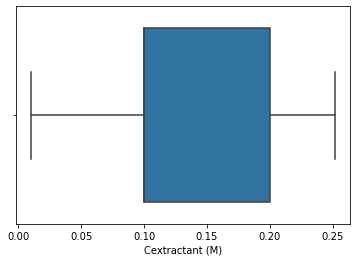

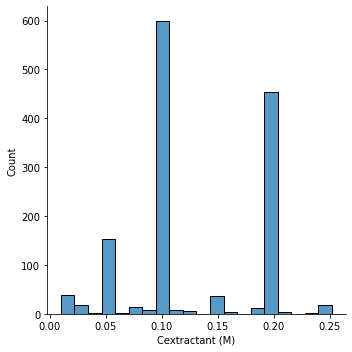

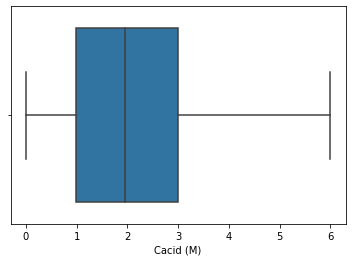

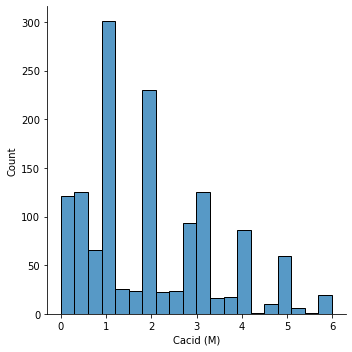

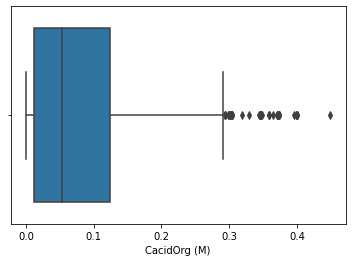

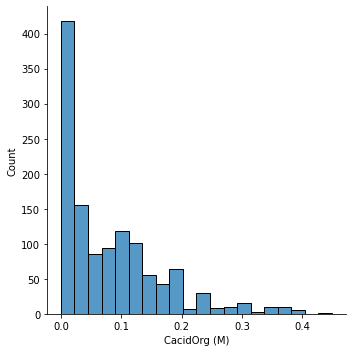

In [11]:
fieldTemp = ['Cextractant (M)', 'Cacid (M)', 'CacidOrg (M)']
for f in fieldTemp:
       sns.boxplot(x=df1[f])
       plt.show()
       sns.displot(df1[f], bins=20, kde=False)
       plt.show()

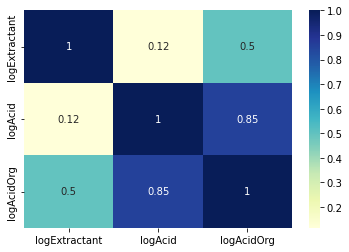

In [12]:
import seaborn as sns


dfCorr = df1[i1+allInputs+o1]

#sns.pairplot(dfCorr, x_vars=i1+allInputs, y_vars=o1, height=5, aspect=1, kind='scatter')
#sns.pairplot(dfCorr,  kind='scatter')
plt.show()
sns.heatmap(dfCorr.corr(), cmap='YlGnBu', annot = True)
plt.show()   #where is XlogP?

In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


coefHistory = []
MAETestHistory = []
MAETrainHistory = []
RMSETestHistory = []
R2testsetHistory = []
R2trainHistory = []
fieldsHistory = []
lenYhistory = []

data = []

import time
start = time.time()
from itertools import combinations
nskiped = 0
ninputs = 0

for setPartition in range(0,10):  #partition is the number of different test configurations
   #print(setPartition)
   tn = -1
   for ele in combinations(allInputs, ninputs):
          #print(list(ele))
          tn +=1
          inputFields = i1+list(ele)
          #print(inputFields)
          yfield = o1

          #df1=df

          #print('*** Using input/output:',inputFields+yfield)
          dfValidFields = df1[inputFields+yfield].copy()

          #Cleaning the null and NaN fields
          feature = dfValidFields[inputFields+yfield].copy()
          feature = feature.dropna()
          feature = feature.drop_duplicates()
          feature = feature.reset_index(drop=True)  ## this line is important, otherwise the indexes will be wierd
          #feature
          if(feature.size <5):
                 print('Low feature size')
                 nskiped += 1
                 continue

          #define the category values
          yfield = yfield[0]
          y = feature[yfield].values
          #print(y)

          feature = feature.drop(yfield, axis=1)
          feature_list = list(feature.columns)
          #feature_list
          X2 = feature.values
          #X2


          min_max_scaler = MinMaxScaler()
          X = min_max_scaler.fit_transform(X2)

          #from sklearn.preprocessing import normalize
          #X = normalize(X2,norm="l2", axis=0)

          #split the data into train and test data sets...

          X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=setPartition)  #test size is 30%

          #apply the multilinear model to predic


          mlr = LinearRegression()
          mlr.fit(X_train,y_train)

          #see the fitted coeficients
          #print("Intercept: ", mlr.intercept_)
          #print("Coefficients:",mlr.coef_)

          expression = ''
          for i,names in enumerate(feature_list):
              #print(names)
              #print(mlr.coef_[0][i])
              expression += '\n +'+f"{mlr.coef_[i]:.6f}"+'* \033[96m'+names+'\033[00m'

          #print('\n',yfield, ' = ', mlr.intercept_, expression)

          #prediction
          ypred = mlr.predict(X_test)
          ypredtrain = mlr.predict(X_train)


          #Model Evaluation test set

          meanAbErr = metrics.mean_absolute_error(y_test, ypred)
          meanSqErr = metrics.mean_squared_error(y_test, ypred)
          rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, ypred))
          R2testset = metrics.r2_score(y_test, ypred)
          #R2testset = 2*(0.8*metrics.r2_score(y_test, ypred)+ 0.2*len(y)/(1000*0.7))
          #print('R squared: ', R2testset) #how many points fall on the prediction line
          #print('Mean Absolute Error:', meanAbErr) # <yreal - ypred>
          #print('Mean Square Error:', meanSqErr) #< (yreal-ypred)^2 >
          #print('Root Mean Square Error:', rootMeanSqErr)
          #print('Accuracy score:', metrics.accuracy_score(y_test, ypred))



          #Model Evaluation train set
          meanAbErrTrain = metrics.mean_absolute_error(y_train, ypredtrain )
          meanSqErrTrain = metrics.mean_squared_error(y_train, ypredtrain)
          rootMeanSqErrTrain = np.sqrt(metrics.mean_squared_error(y_train, ypredtrain))
          R2train = metrics.r2_score(y_train, ypredtrain)
          #R2train = 0.8+metrics.r2_score(y_train, ypredtrain) + 0.2*len(y)/(1000*0.7)
          #print('R squared: ', R2train) #how many points fall on the prediction line
          #print('Mean Absolute Error:', meanAbErr) # <yreal - ypred>
          #print('Mean Square Error:', meanSqErr) #< (yreal-ypred)^2 >
          #print('Root Mean Square Error:', rootMeanSqErr)

          #if (meanAbErr <0.07):
          if (R2testset> 0.0) and (R2train>0.0):
                 R2testsetHistory.append(R2testset)
                 R2trainHistory.append(R2train)
                 #R2testsetHistory.append(meanAbErr)
                 #R2trainHistory.append(meanAbErrTrain)
                 fieldsHistory.append(inputFields)
                 lenYhistory.append(len(y))
                 coefHistory.append(np.concatenate(([mlr.intercept_], mlr.coef_)))
                 MAETestHistory.append(meanAbErr)
                 MAETrainHistory.append(meanAbErrTrain)
                 RMSETestHistory.append(rootMeanSqErr)

                 data.append( [setPartition,tn,lenYhistory[-1], *fieldsHistory[-1], *coefHistory[-1], R2testsetHistory[-1], MAETestHistory[-1],RMSETestHistory[-1] , R2trainHistory[-1],MAETrainHistory[-1]])
                 #break
          #print(data)
          #dfResults = pd.concat([dfResults,pd.DataFrame(data=[setPartition,tn,lenYhistory[-1], fieldsHistory[-1], coefHistory[-1], R2testsetHistory[-1], MAETestHistory[-1]])])

print('Elapsed time:', time.time() - start)

Elapsed time: 0.10525202751159668


In [14]:
#print(data)

dfResults = pd.DataFrame(data = data, columns=['setSeparation','testsetName','Number of points','field1','field2','A','B','C','Rsquared','MAE','RMSE','Rsquared(train)','MAEtrain'])

#dfResults = pd.DataFrame(data = data, columns=['setSeparation','testsetName','Number of points','field1','field2','field3','A','B','C','D','Rsquared','MAE','RMSE', 'Rsquared(train)','MAEtrain'])
#dfResults = pd.DataFrame(data = data, columns=['setSeparation','testsetName','Number of points','field1','field2','field3','field4','A','B','C','D','E','Rsquared','MAE','RMSE', 'Rsquared(train)','MAEtrain'])
#dfResults = pd.DataFrame(data = data, columns=['setSeparation','testsetName','Number of points','field1','field2','field3','field4','field5','A','B','C','D','E','F','Rsquared','MAE','RMSE', 'Rsquared(train)','MAEtrain'])
#dfResults = pd.DataFrame(data = data, columns=['setSeparation','testsetName','Number of points','field1','field2','field3','field4','field5','field6','A','B','C','D','E','F','G','Rsquared','MAE','RMSE', 'Rsquared(train)','MAEtrain'])
print(len(inputFields))
dfResults['Rsquared-adj'] = R2adj(dfResults['Rsquared'], dfResults['Number of points'], len(inputFields))  #last parameter is the number of fields
dfResults

2


,setSeparation,testsetName,Number of points,field1,field2,A,B,C,Rsquared,MAE,RMSE,Rsquared(train),MAEtrain,Rsquared-adj
0,0,0,1191,logExtractant,logAcid,-11.231888,3.682743,7.120405,0.893756,0.334131,0.528464,0.883641,0.384173,0.893157
1,1,0,1191,logExtractant,logAcid,-11.213224,3.631597,7.141984,0.895333,0.351401,0.542105,0.882429,0.377282,0.894742
2,2,0,1191,logExtractant,logAcid,-11.209544,3.659434,7.124341,0.894683,0.345470,0.521245,0.883404,0.378215,0.894089
3,3,0,1191,logExtractant,logAcid,-11.174750,3.764283,6.973526,0.897752,0.362514,0.544123,0.881198,0.371726,0.897175
4,4,0,1191,logExtractant,logAcid,-11.192435,3.625033,7.131370,0.888971,0.367512,0.572008,0.885195,0.369206,0.888344
5,5,0,1191,logExtractant,logAcid,-11.385932,3.812746,7.188254,0.878622,0.372661,0.577966,0.889284,0.370964,0.877936
6,6,0,1191,logExtractant,logAcid,-11.153107,3.672646,7.044147,0.876063,0.374229,0.593111,0.890865,0.364930,0.875363
7,7,0,1191,logExtractant,logAcid,-11.084041,3.499666,7.122084,0.877959,0.387661,0.618117,0.890057,0.361731,0.877270
8,8,0,1191,logExtractant,logAcid,-11.325293,3.732150,7.208587,0.890187,0.376267,0.563940,0.884634,0.365855,0.889567
9,9,0,1191,logExtractant,logAcid,-11.167341,3.775764,6.946908,0.888087,0.372595,0.582773,0.885174,0.368490,0.887455


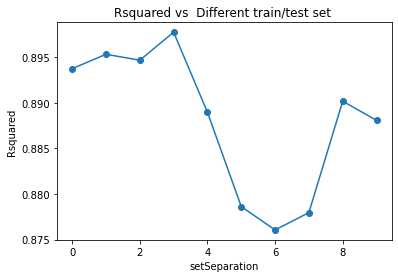

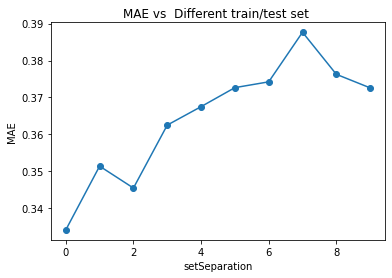

In [15]:
fig, axii = plt.subplots()
axii.set_xlabel('Fields combination used')
for g,d in dfResults.groupby(['testsetName']):
       d.sort_values(by='setSeparation').plot(x='setSeparation', y='Rsquared',  kind='line',
               #ylim=(0,1), xlim=(0,4),
               label='combination '+str(g), ax=axii, legend=None,
               title='Rsquared vs  Different train/test set ', marker='o').set_ylabel('Rsquared')
plt.show()

fig, axii = plt.subplots()
axii.set_xlabel('Fields combination used')
for g,d in dfResults.groupby(['testsetName']):
       d.sort_values(by='setSeparation').plot(x='setSeparation', y='MAE',  kind='line',
               #ylim=(0,1), xlim=(0,4),
               label='combination '+str(g), ax=axii,legend=None,
               title='MAE vs  Different train/test set ', marker='o').set_ylabel('MAE')
plt.show()



#fig, axii = plt.subplots()
#axii.set_xlabel('Fields combination used')
#for g,d in dfResults.groupby(['setSeparation']):
#       d.sort_values(by='testsetName').plot(x='testsetName', y='Rsquared',  kind='line',
#               #ylim=(0,1), xlim=(0,9),
#               label='train set used:'+str(g), ax=axii,
#               title='Rsquared combination', marker='o').set_ylabel('Rsquared')
#plt.show()

[Text(0.5, 0, 'train set'),
 Text(0, 0.5, 'Rsquared'),
 Text(0.5, 1.0, 'Cacidorg = A + B*Cextractant + C*Cacid + D*LogP')]

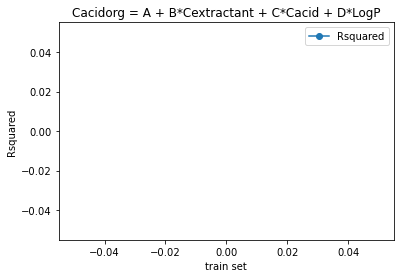

In [29]:
ax = dfResults[dfResults['testsetName']==4].plot(x='setSeparation', y='Rsquared', kind='line', marker='o')
ax.set(xlabel='train set', ylabel='Rsquared', title='Cacidorg = A + B*Cextractant + C*Cacid + D*LogP')

Rsquared-adj   NaN
dtype: float64


array([[<AxesSubplot:title={'center':'MAE'}>]], dtype=object)

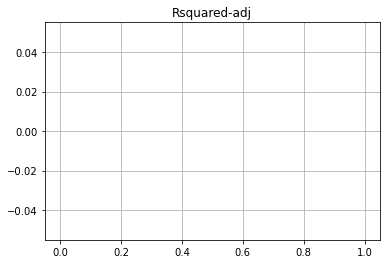

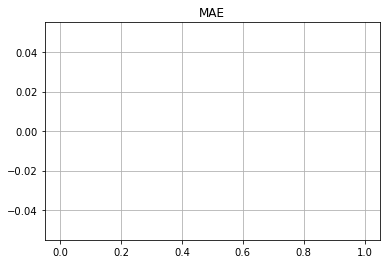

In [30]:
dfResults.loc[dfResults['testsetName'] == 4][['Rsquared-adj']].hist()
print(dfResults.loc[dfResults['testsetName'] == 4][['Rsquared-adj']].std())
dfResults.loc[dfResults['testsetName'] == 4][['MAE']].hist()

In [31]:
dfmean = dfResults.groupby(by='testsetName').mean()
#print(dfmean.columns)
#print(dfResults.groupby(by='testsetName').mean().iloc[1])
#dfmean[[ 'Number of points', 'A', 'B', 'C', 'D', 'Rsquared', 'MAE', 'RMSE']]


#nunique = len(dfResults['field3'].unique())*len(dfResults['field4'].unique()) #len(dfResults['field3'].unique())
#print(nunique, nunique-nskiped)
dfmean['Field3']= fieldsHistory[0:1]#['XlopP','Polarity Index','Branching Index', 'Heterogeneity Index','Wiener','Temp (K)']
dfmean['R2 diff'] =np.abs(dfmean['Rsquared']-dfmean['Rsquared(train)'])
dfmean['Rsquared-adj - std'] = dfResults.groupby(by='testsetName').std()['Rsquared-adj']
dfmean[['Field3','Number of points', 'Rsquared', 'MAE', 'RMSE', 'Rsquared(train)','MAEtrain', 'R2 diff', 'Rsquared-adj','Rsquared-adj - std' ]]

#dfmean[[ 'Number of points', 'A', 'B', 'C', 'D','E', 'Rsquared','MAE', 'RMSE']]
#print(fieldsHistory)

,Field3,Number of points,Rsquared,MAE,RMSE,Rsquared(train),MAEtrain,R2 diff,Rsquared-adj,Rsquared-adj - std
testsetName,,,,,,,,,,
0,"[logExtractant, logAcid]",1191.0,0.888141,0.364444,0.564385,0.885588,0.371257,0.002553,0.88751,0.007957


In [24]:
#dfResults.groupby(by='testsetName').std()[['Number of points', 'Rsquared', 'MAE', 'RMSE', 'Rsquared(train)','MAEtrain', 'Rsquared-adj']]
''' Mean importance of fields'''

dfmean[['Field3','A','B','C', 'Rsquared', 'MAE', 'R2 diff', 'Rsquared-adj','Rsquared-adj - std', 'Number of points' ]]

#dfmean[['Field3','A','B','C','D', 'Rsquared', 'MAE', 'R2 diff', 'Rsquared-adj','Rsquared-adj - std', 'Number of points' ]]
#dfmean[['Field3','A','B','C','D','E', 'Rsquared', 'MAE', 'R2 diff', 'Rsquared-adj','Rsquared-adj - std', 'Number of points' ]]
#dfmean[['Field3','A','B','C','D','E','F', 'Rsquared', 'MAE', 'R2 diff', 'Rsquared-adj','Rsquared-adj - std', 'Number of points' ]]


,Field3,A,B,C,Rsquared,MAE,R2 diff,Rsquared-adj,Rsquared-adj - std,Number of points
testsetName,,,,,,,,,,
0,"[logExtractant, logAcid]",-11.213755,3.685606,7.100161,0.888141,0.364444,0.002553,0.88751,0.007957,1191.0


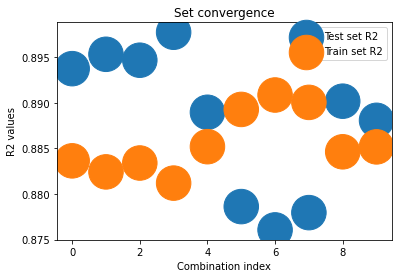

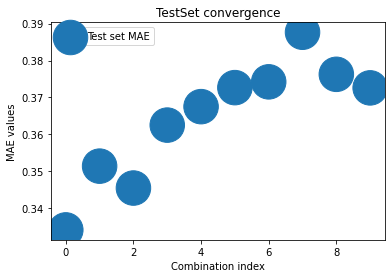

0  :  Set length= 1191  :  ['logExtractant', 'logAcid']
1  :  Set length= 1191  :  ['logExtractant', 'logAcid']
2  :  Set length= 1191  :  ['logExtractant', 'logAcid']
3  :  Set length= 1191  :  ['logExtractant', 'logAcid']
4  :  Set length= 1191  :  ['logExtractant', 'logAcid']
5  :  Set length= 1191  :  ['logExtractant', 'logAcid']
6  :  Set length= 1191  :  ['logExtractant', 'logAcid']
7  :  Set length= 1191  :  ['logExtractant', 'logAcid']
8  :  Set length= 1191  :  ['logExtractant', 'logAcid']
9  :  Set length= 1191  :  ['logExtractant', 'logAcid']


In [32]:

plt.scatter(range(0,len(R2testsetHistory)),R2testsetHistory, lenYhistory, label='Test set R2')
plt.title('TestSet convergence')
plt.ylabel('R2 values')
plt.xlabel('Combination index')
#plt.show()
plt.scatter(range(0,len(R2trainHistory)),R2trainHistory, lenYhistory,  label='Train set R2')
plt.title('Set convergence')
plt.legend()
plt.show()

plt.scatter(range(0,len(MAETestHistory)),MAETestHistory, lenYhistory, label='Test set MAE')
plt.title('TestSet convergence')
plt.ylabel('MAE values')
plt.xlabel('Combination index')
#plt.show()
#plt.scatter(range(0,len(MAETrainHistory)),MAETrainHistory, lenYhistory,  label='Train set MAE')
#plt.title('TrainSet convergence')
plt.legend()
plt.show()

for i,field in enumerate(fieldsHistory):
       print(i,' : ', 'Set length=',lenYhistory[i],' : ',field)

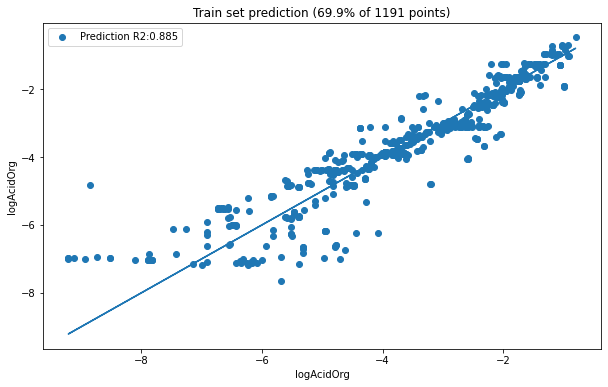

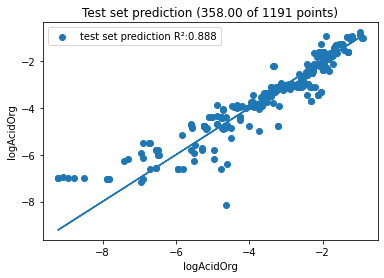

In [33]:
#See how the predicted Y values compare to the predicted Y values (x axis is ordered by the row index)
plt.figure(figsize=(10,6))
plt.scatter(y_train, ypredtrain, label='Prediction R2:'+f'{metrics.r2_score(y_train, ypredtrain):.3f}' )
plt.plot(y_train, y_train)
#plt.plot(ypredtrain, label='Pred')
plt.xlabel(yfield)
#plt.xlabel('$[Acid]_{org} (M)$')
#plt.ylabel(r'$\mathrm{Predicted} \; [Acid]_{org} (M)$')
plt.ylabel(yfield)
plt.title("Train set prediction ("+ f"{100*len(y_train)/(len(y_test)+len(y_train)):.1f}"+'% of '+str(len(y))+' points)' )
plt.legend()

plt.show()

#See how the predicted Y values compare to the predicted Y values (x axis is ordered by the row index)
plt.scatter(y_test, ypred, label='test set prediction R²:'+f'{metrics.r2_score(y_test, ypred):.3f}')
plt.plot(y_test, y_test)
plt.xlabel(yfield)
plt.ylabel(yfield)
plt.title("Test set prediction ("+ f"{len(y_test):.2f}"+' of '+str(len(y))+' points)' )
#plt.text(1.1,0.4, 'MAE:'+f'{meanAbErr:.3f}', fontsize=12)
#plt.text(1.1,0.5, 'R²:'+f'{metrics.r2_score(y_test, ypred):.3f}', fontsize=12)
plt.legend()
plt.show()

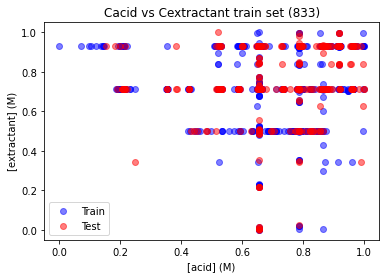

In [27]:
plt.xlabel('[acid] (M)')
plt.ylabel('[extractant] (M)')
plt.title('Cacid vs Cextractant train set ('+str(len(X_train))+')')
plt.scatter(X_train[:,1], X_train[:,0], color='blue', alpha=0.5, label='Train')
plt.scatter(X_test[:, 1], X_test[:, 0], color ='red', alpha=0.5, label='Test')
plt.legend()

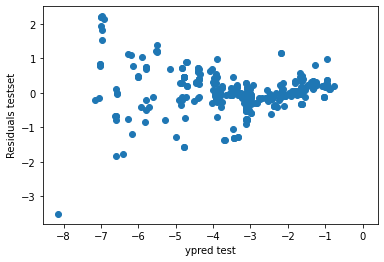

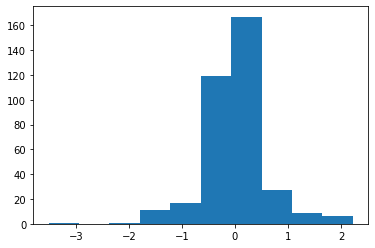

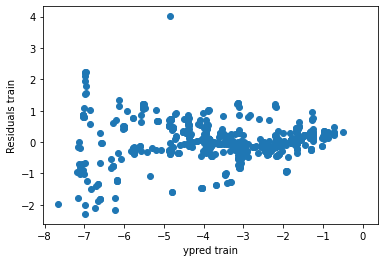

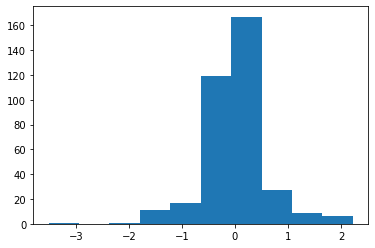

In [28]:
#checking the residuals of the fitting
#checking homoscedaicety
plt.ylabel('Residuals testset')
plt.xlabel('ypred test')
plt.scatter(ypred,ypred-y_test)
plt.plot(0)
plt.show()

#this should follow a gaussian distribution, more points are closer to zero, and errors decay away from zero
plt.hist(ypred-y_test)
plt.show()

#checking the residuals of the fitting
#checking homoscedaicety
plt.ylabel('Residuals train')
plt.xlabel('ypred train')
plt.scatter(ypredtrain,ypredtrain-y_train)
plt.plot(0)
plt.show()

#this should follow a gaussian distribution, more points are closer to zero, and errors decay away from zero
plt.hist(ypred-y_test)
plt.show()


 i3, o1 R2 = 85, for 10% test
 i5, o1 R2 train = 0.94 for 60% train
 i6, o5 (Rg), R2 98/86 good but not many points...
 i11, o1 lots of diversity, 70%